# Ensemble quântico, entropia e operador de densidade

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as st
from IPython.display import Image

Estou assumindo aqui, que você, jovem leitor(a/e), já possui algum conhecimento a respeito de ensembles e o que são. Muito do que for apresentado aqui foi retirado do livro **Modern Quantum Mechanics, J. J. Sakurai**. Sendo assim, o(a/e) leitor(a/e) mais curioso(a/e) pode buscar ler este livro e similares.

Começaremos com a definição de um operador de densidade, se temos um ensemble onde os possíveis estados de seus constituintes é descrito por $\left| \alpha^{i} \right \rangle$, onde $i = 1,...,N$ representa o índice correspondente aos $N$ possíveis estados, e pesos $w_i$, o operador de densidade de estados é definido como

$$ \rho = \sum_{i=1}^{N} w_i \left| \alpha^{i} \right \rangle \left \langle \alpha^{i} \right | $$

Sendo que $\rho$ está sujeito à condição de normalização $\text{tr}(\rho) = 1$. Para um dado operador $A$ que atua em nosso ensemble, o valor esperado de $A$ sobre o ensemble é dado por

$$ \left \langle A \right \rangle = \text{tr}(\rho A), $$

que independe da base de representação escolhida.

Já que ensembles são descritos em termos dos kets de estados dos seus constituíntes, a evolução temporal de de $\rho$ é dada em termos da evolução temporal dos estados de acordo com a equação de Schrodinger

$$ i \hbar \frac{\partial \left| \alpha \right \rangle}{\partial t} = H, $$

que aplicada no operador de densidade resulta em

$$ i \hbar \frac{\partial \rho}{\partial t} = \sum_{i=1}^{N} w_i \left( H \left| \alpha^{i}, t \right \rangle \left \langle \alpha^{i}, t \right| - \left| \alpha^{i}, t \right \rangle \left \langle \alpha^{i}, t \right| H \right) = [H, \rho] = -[\rho, H]$$

Estamos agora prontos para ver como ensembles se conectam com entropia, desordem e mecânica estatística.

## Entropia

Para um ensemble totalmente aleatório, a densidade de estados em cada possível $\left| \alpha^i \right \rangle$ é homogênea, isto é, a chance de se medir alguma partícula deste ensemble em algum estado $\left| \alpha^i \right \rangle$ específico é a mesma. Sendo assim, $w_i = 1/N$, onde $N$ são os possíveis estados no ensemble. A forma matricial do operador de densidade pode ser expressa então como

$$ \rho = \frac{1}{N} \begin{pmatrix}
1 & 0 & ... & 0 & 0 \\
0 & 1 & ... & 0 & 0 \\
  &   & ... &   &   \\
0 & 0 & ... & 1 & 0 \\
0 & 0 & ... & 0 & 1
\end{pmatrix} $$

Já para um ensemble puro, $w_i = 1$ para algum $i$ específico, e 0 para os demais, já que todos os constituíntes do ensemble estão em um único estado. Dessa forma, o operador de densidade é similar ao de cima, exceto que apenas um dos valores na diagonal é 1 enquanto os demais são 0.

Como quantificamos a diferença entre os dois, em termos dos estados que nosso ensemble possui? Para isso, definimos então

$$ \sigma = -\text{tr}[\rho \ln(\rho)] $$

Trabalhando em uma base na qual $\rho$ seja diagonal ($\rho_d$), podemos escrever

$$ \sigma = -\sum_{i=1}^N \rho_d \ln(\rho_d) $$

Veja que, para um ensemble totalmente aleatório $\rho_d$ tem o valor $1/N$ para todos os elementos, logo

$$ \sigma_{max} = - \sum_{i=1}^N \frac{1}{N} \ln \left( \frac{1}{N} \right) = \ln(N)$$

Sendo assim, quanto maior o valor de $N$ estados possíveis para o ensemble ter, ou seja, quanto maior a diversidade do ensemble, maior o valor máximo de $\sigma$.

Já para um ensemble puro, $\rho_d = 1$ em um elemento apenas do somatório, enquanto os demais são 0. Já que $ln(1) = 0$, então

$$ \sigma_{min} = 0$$

Nesse caso, $\sigma$ pode nos dar uma medição da "desordem" de nosso ensemble. Um valor baixo indica que o "ensemble" está próximo do seu valor mínimo onde todos os constituíntes está em um mesmo estado fixo. Enquanto que valores altos indicam algo próximo de uma distribuição aleatória de estados. Em mecânica estatística, a grandeza que mede a "desordem" de um sistema é conhecida como **entropia**. Portanto, a entropia deve ser proporcional à $\sigma$

$$ S = k_b \sigma$$

onde $k_b$ é uma constante de proporcionalidade com dimensões de Joule por Kelvin (as razões disso estão na mecânica estatística). Sendo assim, $k_b$ é definida como sendo a constante de Bolztmann

$$ k_b = 1.38 \times 10^{-23} J.K^{-1} $$

### Visualização

Suponha 4 ensembles diferentes de um sistema de 10 níveis, todos descritos em uma base que diagonaliza $\rho$. O 1º possui os estados todos próximos do estado fundamental, de forma que distribuição de estados é descrito como uma distribuição gamma($\alpha$, $\beta$). Os demais, até o penúltimo ensemble, também possuem uma distribuição próxima do estado fundamental, mas com a distribuição cada vez mais larga, tornando a distribuição de estados cada vez mais próxima de uma distribuição uniforme. Apenas o último que é descrito por uma distribuição uniforme, dando a característica de seus estados estarem distribuidos como um ensemble aleatório.

Vamos supor que nossos ensembles possuam, cada um, 100 mil constituíntes. Sendo assim, as distribuições de estados para cada um deles pode ser calculada pelas distribuições gamma e uniforme.

Antes de tudo vamos definir os parâmetros para esta visualização, por fins de praticidade, usarei $k_b = 1$, de forma que $\beta = 1/T$.

In [2]:
n_ensembles = 4
n_levels = 10
n_particles = 100000

In [3]:
def ensemble(ensembles, max_levels, particles):
  """
  Definindo a função que cria os ensembles de n partículas e retorna um
  dicionário com as partículas em linhas e cada tipo de ensemble em uma coluna
  """
  ensembles_results = {}
  # Coluna primaria com os identificadores de cada partícula
  ensembles_results['Particle energy'] = [f'Particle {i}' for i in range(particles)]
  # Loop para sortear energias para as partículas de acordo com as distribuições
  # para os níveis de energia do sistema
  for i in range(ensembles):
    # Distribuições gamma
    if i < ensembles-1:
      levels = []
      while len(levels) != particles:
        particle_energy = int(np.random.gamma(1, 10**(i-1)))
        if particle_energy <= max_levels:
          levels.append(particle_energy)
      ensembles_results[f'ensemble {i}'] = levels
    # Distribuições uniformes
    elif i == ensembles-1:
      levels = []
      for j in range(particles):
        levels.append(int(np.random.uniform(0, max_levels+1)))
      # Cria uma coluna com um ID para cada ensemble e guarda as energias na coluna
      ensembles_results[f'ensemble {i}'] = levels
  return ensembles_results

In [4]:
# Chamo a função e transformo o dicionário em um Pandas DataFrame
results = ensemble(n_ensembles, n_levels, n_particles)
results = pd.DataFrame(results).set_index('Particle energy')

In [5]:
results.head()

,ensemble 0,ensemble 1,ensemble 2,ensemble 3
Particle energy,,,,
Particle 0,0,0,1,1
Particle 1,0,0,0,5
Particle 2,0,1,2,1
Particle 3,0,1,8,10
Particle 4,0,0,10,8


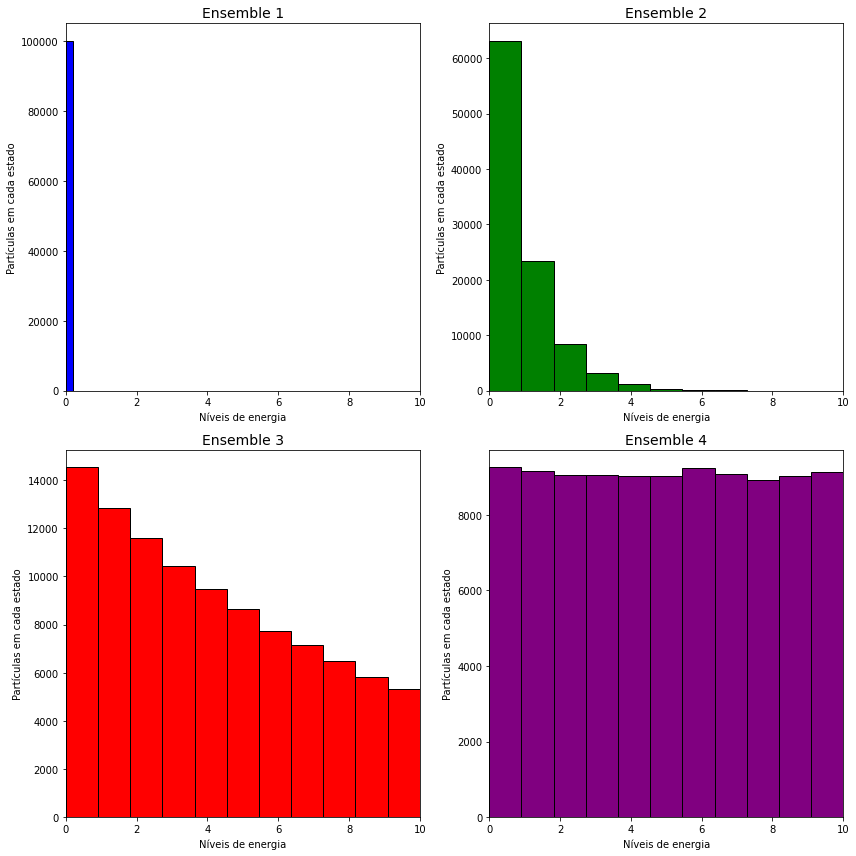

In [6]:
# Gráfico para plotar as distribuições de partículas em cada nível de energia
# do sistema

fig, ax = plt.subplots(2, 2, figsize = (12,12))

ax[0,0].hist(results['ensemble 0'], bins = 5, color = 'blue', edgecolor = 'black')
ax[0,0].set_xlim(0, n_levels)
ax[0,0].set_xlabel('Níveis de energia')
ax[0,0].set_ylabel('Partículas em cada estado')
ax[0,0].set_title('Ensemble 1', fontsize = 14)

ax[0,1].hist(results['ensemble 1'], bins = n_levels+1, color = 'green', edgecolor = 'black')
ax[0,1].set_xlim(0, n_levels)
ax[0,1].set_xlabel('Níveis de energia')
ax[0,1].set_ylabel('Partículas em cada estado')
ax[0,1].set_title('Ensemble 2', fontsize = 14)

ax[1,0].hist(results['ensemble 2'], bins = n_levels+1, color = 'red', edgecolor = 'black')
ax[1,0].set_xlim(0, n_levels)
ax[1,0].set_xlabel('Níveis de energia')
ax[1,0].set_ylabel('Partículas em cada estado')
ax[1,0].set_title('Ensemble 3', fontsize = 14)

ax[1,1].hist(results['ensemble 3'], bins = n_levels+1, color = 'purple', edgecolor = 'black')
ax[1,1].set_xlim(0, n_levels)
ax[1,1].set_xlabel('Níveis de energia')
ax[1,1].set_ylabel('Partículas em cada estado')
ax[1,1].set_title('Ensemble 4', fontsize = 14)

plt.tight_layout()

In [7]:
def entropy(ensemble, max_levels):
  """
  Função para calcular a entropia de cada ensemble criado
  """
  results = {}
  for i in range(max_levels):
    results[i] = 0
    for idx, key in enumerate(ensemble):
      if ensemble[idx] == i:
        results[i] += 1/len(ensemble)
  results = results
  #print(results)
  s_values = []
  for idx, key in enumerate(results):
    if results[key] != 0:
      s_values.append(results[key])
    elif results[key] == 0:
      s_values.append(1e-10)
  #print(s_values)
  s = -np.sum(s_values*np.log(s_values))
  return s

In [8]:
# Entropia máxima ln(N)
max_entropy = np.log(n_levels)

Text(0, 0.5, 'Entropia')

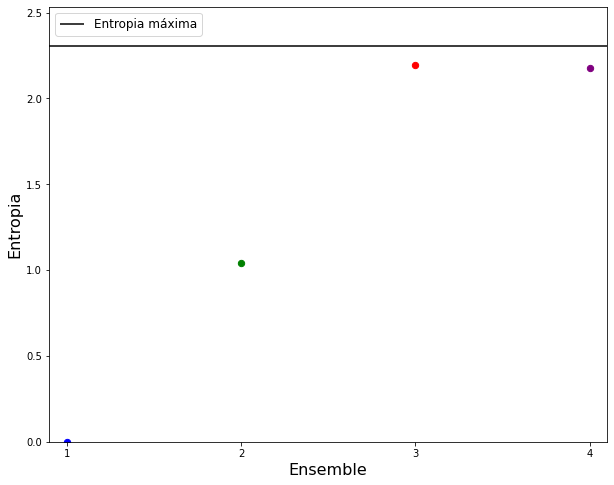

In [9]:
# Definindo a cor de cada ponto
colors = ['blue', 'green', 'red', 'purple']

# Plot de cada ensemble e sua entropia associada
plt.figure(figsize=(10,8))
for i in range(n_ensembles):
  plt.scatter(i, entropy(results[f'ensemble {i}'], n_levels), color = colors[i],
              s = 40)

plt.hlines(max_entropy, -1, n_ensembles, label = 'Entropia máxima')
plt.xlim(-0.1, 3.1)
plt.ylim(0, 1.1*max_entropy)
plt.legend(loc = 'upper left', fontsize = 12)
plt.xticks([0,1,2,3], labels = [1,2,3,4])
plt.xlabel('Ensemble', fontsize = 16)
plt.ylabel('Entropia', fontsize = 16)

Note como de fato, quanto mais homogênea a distribuição de estados no ensemble, mais a entropia deste ensemble se aproxima do valor máximo $S_{max} = k_b \ln(N)$.

## Densidade de estados

Um princípio fundamental da natureza é a maximização da entropia dada um valor médio da hamiltoniana $\left \langle H \right \rangle$. Uma vez que este equilíbrio é atingido, temos que o operador de densidade não varia mais, portanto

$$ \frac{\partial \rho}{\partial t} = 0 $$

O que significa que $[H, \rho] = 0$. Logo, se o operador de densidade e a Hamiltoniana podem ser diagonalizados simultaneamente, podemos utilizar os kets de energia para descrever os estados. Para maximizarmos $\sigma$ (e por consequência a entropia), vamos impor que

$$ \delta \sigma = 0 $$

Isto é, não há mais variação de $\sigma$ após o equilíbrio. Lembrando que a Hamiltoniana possui um valor médio no ensemble, também impomos que

$$ \delta \left \langle H \right \rangle = \sum_i \delta \rho_i E_i = 0 $$

o que significa que, se $E_i$ é diferente de 0,

$$ \sum_i \delta \rho_i = \delta \text{tr}(\rho) = 0 $$

Em termos de mecânica estatística, $\left \langle H \right \rangle$ é conhecida como a energia interna do sistema $U$.

Podemos obter qual $\rho$ satisfaz estas condições de maximização utilizando multiplicadores de Langrange.

$$ \sum_i \delta \rho_i \left[ (\ln(\rho_i) + 1) + \beta E_i + \gamma \right] = 0 $$

o que nos dá (supondo que podemos fazer isso para qualquer variação $\delta \rho_i$)

$$ \rho_i = e^{-\beta E_i - \gamma - 1} $$

Lembrando que $\sum_i \rho_i = 1$, podemos escolher $\gamma = 0$ já que $e^{-\gamma} = 1$ se $\gamma = 0$ e o resultado final é escrito

$$ \rho_i = \frac{e^{-\beta E_i}}{\sum_j^N e^{\beta E_j}} $$

Dessa forma, temos já normalizado a fração de estados com uma energia $E_i$. Note que, se $\beta \rightarrow 0$, a exponencial de cima vai a 1 e a de baixo também, resultando em

$$ \rho_i = \frac{1}{\sum_j^N 1} = \frac{1}{N} $$

resultado este que independe de $i$, portanto a fração de estados é a mesma para qualquer energia. Em mecânica estatística, vemos que $\beta = 1/k_bT$, sendo $k_b$ a constante de Boltzmann e $T$ a temperatura. Portanto, podemos entender $\beta \rightarrow 0$ como $T \rightarrow \infty$

### Visualização

Vamos agora dar uma visualizada nessa transição de densidades de estados conforme a temperatura aumenta. Vamos supor um sistema com 3 níveis de energia e ver como a fração de cada um deles muda conforme aumentamos a temperatura $T$. Em seguinda, investigaremos como a entropia do ensemble muda conforme a temperatura tende a igualar a fração de estados em cada nível de energia do ensemble.

In [10]:
# Definindo os parametros de energia e temperatura
E_i = [1,2,3]
T = np.linspace(0.1, 1000, 100000)

In [11]:
def rho_kk(T, E_k: float, E_i: list):
  """
  Função para calcular a fração de um estado de energia E_k, dados os possíveis
  estados E_i do sistema, em função da temperatura T
  """
  k = 1 #Constante de bolztmann
  rho_final = [] #Lista onde ficarão guardados os valores da fração do estado para cada T
  if type(T) == np.float64: #T pode ser um numero
    rho_numerator = np.exp(-E_k/(k*T))
    rho_denominator = 0
    for i in range(len(E_i)):
      rho_denominator += np.sum(np.exp(-E_i[i]/(k*T)))
    rho = rho_numerator/rho_denominator
    rho_final.append(rho)
  else: #Ou T pode ser uma sequência de numeros (melhor para fazer um gráfico)
    for j in range(len(T)):
      rho_numerator = np.exp(-E_k/(k*T[j]))
      rho_denominator = 0
      for i in range(len(E_i)):
        rho_denominator += np.sum(np.exp(-E_i[i]/(k*T[j])))
      rho = rho_numerator/rho_denominator
      rho_final.append(rho)
  return rho_final

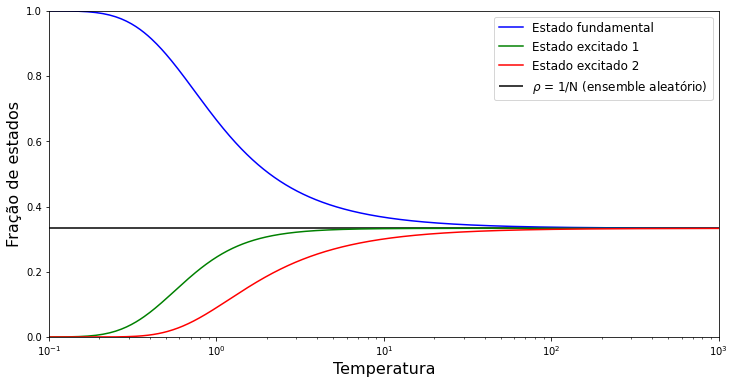

In [12]:
# Gráfico das frações dos estados em função da temperatura
fig = plt.figure(figsize=(12,6))
plt.plot(T, rho_kk(T, E_k=1, E_i=E_i), color = 'blue', label = 'Estado fundamental')
plt.plot(T, rho_kk(T, E_k=2, E_i=E_i), color = 'green', label = 'Estado excitado 1')
plt.plot(T, rho_kk(T, E_k=3, E_i=E_i), color = 'red', label = 'Estado excitado 2')
plt.hlines(1/len(E_i), T[0], T[-1], label = r'$\rho$ = 1/N (ensemble aleatório)')
plt.xscale('log')
plt.ylim(0,1)
plt.xlim(T[0], T[-1])
plt.xlabel('Temperatura', fontsize = 16)
plt.ylabel('Fração de estados', fontsize = 16)
plt.legend(loc = 'upper right', fontsize = 12)

Conforme a temperatura se aproxima de 0, o ensemble tende a um ensemble puro onde todas as partículas estão no estado fundamental. A medida que $T$ aumenta, a fração de estados no primeiro nível excitado aumentam, em seguida as fração de estados no 2º nível excitado. Quando $T \rightarrow \infty$, as frações tendem todas as $1/N = 1/3$.

In [13]:
T = np.linspace(0.01, 100, 10000)

In [14]:
# Calculo da entropia
def entropy_new(T, energies):
  """
  Esta função usa a função anterior rho_kk para calcular a entropia
  do ensemble em cada configuração de rho, ou seja, em função da temperatura
  """
  entropy = []
  for i in range(len(T)):
    density = []
    for j in range(len(energies)):
      density.append(rho_kk(T[i], E_k=energies[j], E_i=energies))
    s = -np.sum(density*np.log(density))
    entropy.append(s)
  return entropy

In [15]:
# Entripia máxima
max_entropy = np.log(len(E_i))

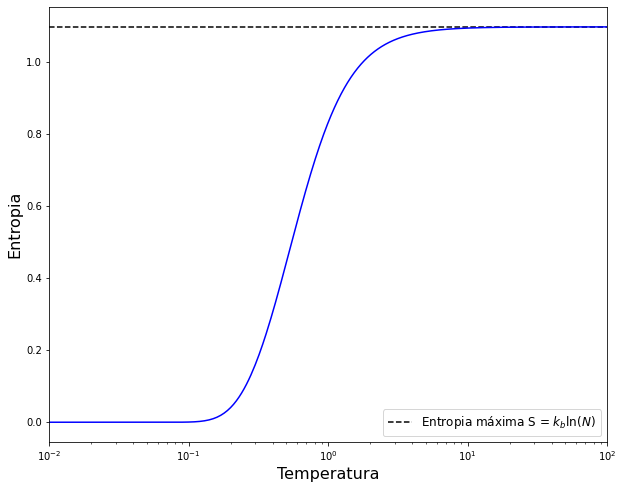

In [16]:
plt.figure(figsize=(10,8))
plt.plot(T, entropy_new(T, E_i), color = 'blue')
plt.hlines(max_entropy, T[0], T[-1], linestyles = 'dashed', label = r'Entropia máxima S = $k_b \ln(N)$')
plt.xscale('log')
plt.xlabel('Temperatura', fontsize = 16)
plt.ylabel('Entropia', fontsize = 16)
plt.xlim(T[0], T[-1])
plt.legend(loc = 'lower right', fontsize = 12)

Veja como as duas coisas acontecem juntas. Conforme a temperatura aumenta, a distribuição de estados no ensemble tende a ser mais homogênea e a entropia cresce, o que é esperado já que entropia é associada à distribuição de estados que um ensemble de partículas possui.

## Aplicações

### Átomo de hidrogênio

Vamos agora elaborar uma rápida aplicação destas relações em um ensemble de átomos de hidrogênio para algum experimento. Agora, usaremos o valor de $k_b$ dado em eletron-volts por kelvin

$$ k_b = 8.617 \times 10^{-5} \hspace{0.2cm} \frac{\text{eV}}{\text{K}}. $$

O que faremos aqui é verificar como um ensemble de átomos de hidrogênio muda a densidade de estados (representados na base da energia) e a entropia conforme aumentamos a temperatura. Vamos supor 1 milhão de átomos de hidrogênio.

A princípio, o espectro de energias do átomo de hidrogênio depende apenas do numero quântico principal $n$, aqui não iremos considerar efeitos de estrutura fina no espectro de energias

$$ E_{n} = - \frac{m_e e^4}{2(4\pi \epsilon_0)^2 \hbar^2}\frac{1}{n^2} = -\frac{13.6 \text{eV}}{n^2}$$

O nível fundamental $E_1$ possui energia de -13.6 eV. Iremos transladar o referêncial de energia 0 para o estado fundamental, de forma que o estado fundamental possuirá energia 0 e os demais estados tem suas energias descritas em termos do estado fundamental.

In [17]:
n = 10 #Quantidade de níveis de energia no ensemble
E = [13.6 - 13.6 / i**2 for i in range(1,n+1)] #Energias em cada nível com relação ao nível fundamental
k_b = 8.617e-5 #Constante de Boltzmann
T = np.linspace(0.1, 300, 10000) #Temperature in Kelvin

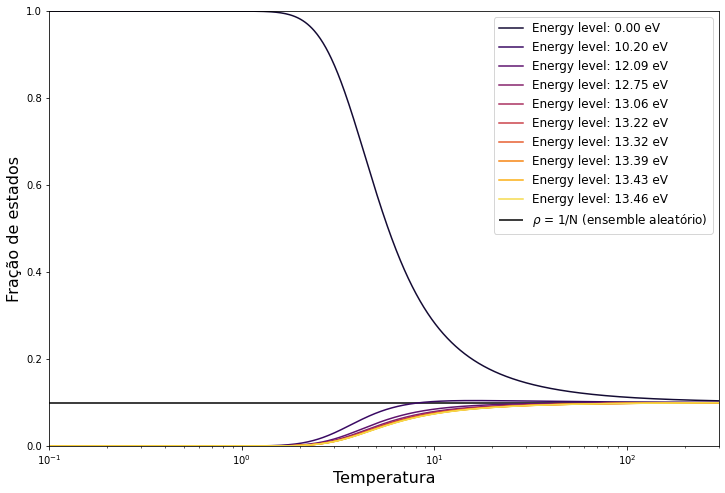

In [19]:
# Gráfico das frações dos estados em função da temperatura
fig = plt.figure(figsize=(12,8))

idx = -1
for energy in E:
  idx += 1
  plt.plot(T, rho_kk(T, E_k = energy, E_i = E),
           color = sns.color_palette("inferno", 10)[idx],
           label = f'Energy level: {energy:.2f} eV')

plt.hlines(1/len(E), T[0], T[-1], label = r'$\rho$ = 1/N (ensemble aleatório)')
plt.xscale('log')
plt.ylim(0,1)
plt.xlim(T[0], T[-1])
plt.xlabel('Temperatura', fontsize = 16)
plt.ylabel('Fração de estados', fontsize = 16)
plt.legend(loc = 'upper right', fontsize = 12)

Temos um comportamento esperado, em temperaturas baixas, o ensemble se encontra com quase todos os átomos no estado fundamental. O interessante está em ver a transição do ensemble puro para o ensemble aleatório. Note que o segundo estado de energia só começa a ser de fato ocupado por alguns átomos do ensemble quando a temperatura atinge algo próximo de 1 kelvin. Entretanto, note como os demais estados (o terceiro, o quarto...) começam a ser populados cada vez mais rápidos. Isso se deve ao fato de que a diferença de energia $\Delta E$ entre dois estados de energia vizinhos fica cada vez menor conforme $n$ aumenta, o que faz com que estados seguintes sejam ocupados com cada vez mais facilidade.

In [20]:
def entropy(ensemble, max_levels, k = 1):
  """
  Função para calcular a entropia de cada ensemble criado
  """
  results = {}
  for i in range(max_levels):
    results[i] = 0
    for j in range(len(ensemble)):
      if j == i:
        results[i] += ensemble[j]
  results = results
  #print(results)
  s_values = []
  for idx, key in enumerate(results):
    if results[key] != 0:
      s_values.append(results[key])
    elif results[key] == 0:
      s_values.append(1e-10)
  #print(s_values)
  s = -np.sum(s_values*np.log(s_values))
  return s*k

Vamos agora ver como se da a distribuição de estados, ou seja, vamos calcular $\text{Tr}(\rho)$ para algumas temperaturas específicas, e ver como a densidade de estados e a entropia são modificadas conforme a temperatura aumenta.

Text(0.5, 0, 'Temperatura (K)')

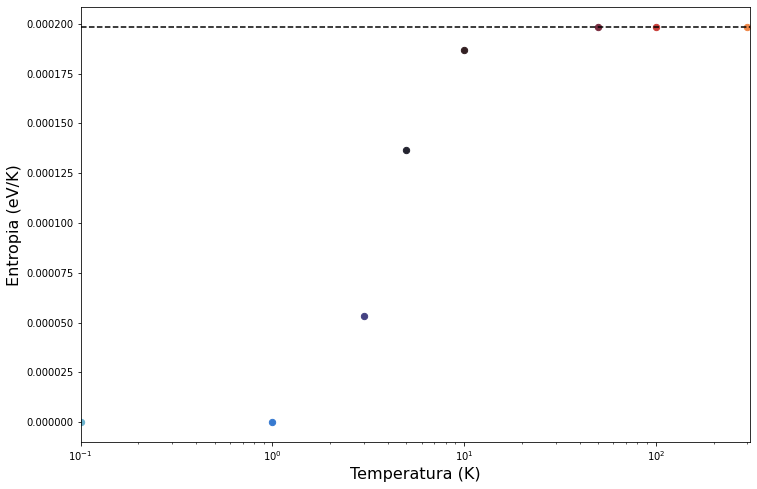

In [23]:
T_key = np.array([0.1, 1, 3, 5, 10, 50, 100, 300]) #Temperaturas especificas
fig = plt.figure(figsize=(12,8))

for i in range(len(T_key)):
  ensemble = []
  for energy in E:
    densities = rho_kk(T_key[i], E_k = energy, E_i = E)[0]
    ensemble.append(densities)
  plt.scatter(T_key[i], entropy(ensemble, len(E), k_b), color = sns.color_palette("icefire", 8)[i],
              s = 40)
plt.xscale('log')
plt.hlines(k_b*np.log(len(E)), T[0], T[-1]+10, linestyles = 'dashed', label = 'Maximum entropy')
plt.ylabel('Entropia (eV/K)', fontsize = 16)
plt.xlim(T[0], T[-1]+10)
plt.xlabel('Temperatura (K)', fontsize = 16)

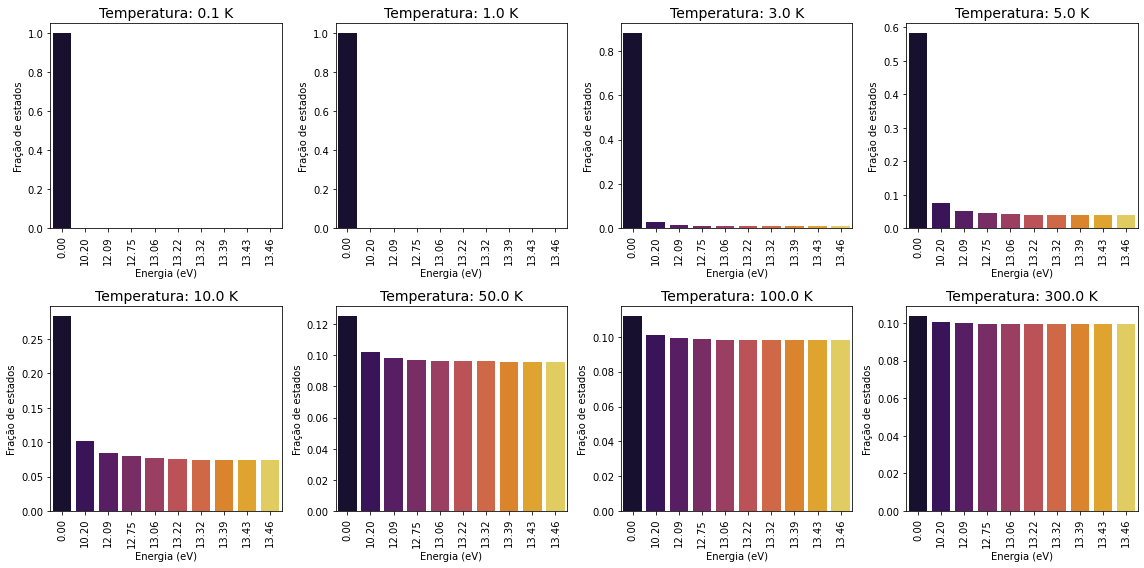

In [34]:
fig, ax = plt.subplots(2,4, figsize=(16,8))

for i in range(len(T_key)):
  ensemble = {}
  densities = []
  for energy in E:
    density = rho_kk(T_key[i], E_k = energy, E_i = E)[0]
    densities.append(density)
  ensemble['Energy'] = E
  ensemble['Density'] = densities
  if i < 4:
    sns.barplot(data = ensemble, x = 'Energy', y = 'Density', palette = 'inferno', ax = ax[0,i])
    ax[0,i].set_title(f'Temperatura: {T_key[i]:.1f} K', fontsize = 14)
    ax[0,i].set_xticks([0,1,2,3,4,5,6,7,8,9])
    ax[0,i].set_xticklabels([f'{E[i]:.2f}' for i in range(len(E))], rotation = 90)
    ax[0,i].set_xlabel('Energia (eV)')
    ax[0,i].set_ylabel('Fração de estados')
  else:
    sns.barplot(data = ensemble, x = 'Energy', y = 'Density', palette = 'inferno', ax = ax[1,i-4])
    ax[1,i-4].set_title(f'Temperatura: {T_key[i]:.1f} K', fontsize = 14)
    ax[1,i-4].set_xticks([0,1,2,3,4,5,6,7,8,9])
    ax[1,i-4].set_xticklabels([f'{E[i]:.2f}' for i in range(len(E))], rotation = 90)
    ax[1,i-4].set_xlabel('Energia (eV)')
    ax[1,i-4].set_ylabel('Fração de estados')

plt.tight_layout()

Nesta ultima imagem, veja exatamente como crescem as frações dos estados de energia mais alta. Para os estados de maior energia, a ocupação deles é quase igual, devido ao baixo $\Delta E$ entre eles. No próximo exemplo, do oscilador harmônico, onde $\Delta E$ é igual entre todos os estados vizinhos, veremos que a forma como a ocupação de estados muda no ensemble é bem diferente.

### Oscilador harmônico

Neste próximo exemplo, vamos considerar um ensemble de osciladores harmônicos. Pode ser que estejamos criando um ensemble de moléculas diatômicas e estamos caracterizando-as pelo seu nível de energia vibracional, por exemplo. Os níveis de energia em um oscilador harmônico quântico são dados por

$$ E_n = \hbar \omega \left( \frac{1}{2} + n \right). $$

Neste exemplo, não iremos específicar $\hbar \omega$ e iremos interpretar as energias em termos de $\hbar \omega$.

In [35]:

n = 10 #Quantidade de níveis de energia no ensemble
E = [(i + 1/2) for i in range(n)] #Energias em cada nível com relação ao nível fundamental
k_b = 8.617e-5 #Constante de Boltzmann
T = np.linspace(0.1, 300, 10000) #Temperature in Kelvin

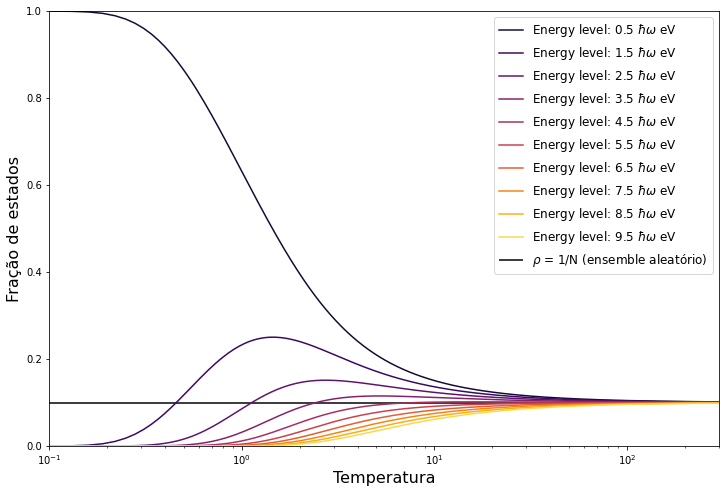

In [36]:
# Gráfico das frações dos estados em função da temperatura
fig = plt.figure(figsize=(12,8))

idx = -1
for energy in E:
  idx += 1
  plt.plot(T, rho_kk(T, E_k = energy, E_i = E),
           color = sns.color_palette("inferno", 10)[idx],
           label = r'Energy level: %.1f $\hbar \omega$ eV' %energy)

plt.hlines(1/len(E), T[0], T[-1], label = r'$\rho$ = 1/N (ensemble aleatório)')
plt.xscale('log')
plt.ylim(0,1)
plt.xlim(T[0], T[-1])
plt.xlabel('Temperatura', fontsize = 16)
plt.ylabel('Fração de estados', fontsize = 16)
plt.legend(loc = 'upper right', fontsize = 12)

Veja como a fração de estados cresce de forma diferente, comparada ao exemplo anterior do átomo de hidrogênio.

Text(0.5, 0, 'Temperatura')

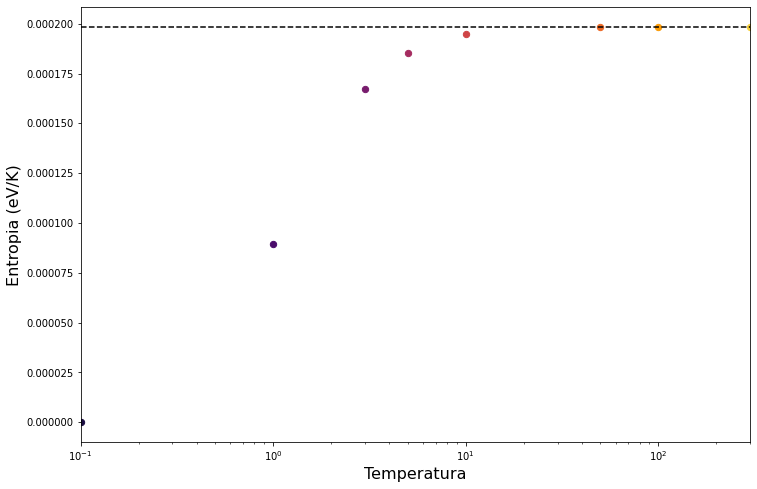

In [38]:
T_key = np.array([0.1, 1, 3, 5, 10, 50, 100, 300]) #Temperaturas especificas
fig = plt.figure(figsize=(12,8))

for i in range(len(T_key)):
  ensemble = []
  for energy in E:
    densities = rho_kk(T_key[i], E_k = energy, E_i = E)[0]
    ensemble.append(densities)
  plt.scatter(T_key[i], entropy(ensemble, len(E), k_b), color = sns.color_palette("inferno", 8)[i],
              s = 40)
plt.xscale('log')
plt.hlines(k_b*np.log(len(E)), T[0], T[-1]+10, linestyles = 'dashed', label = 'Maximum entropy')
plt.ylabel('Entropia (eV/K)', fontsize = 16)
plt.xlim(T[0], T[-1])
plt.xlabel('Temperatura', fontsize = 16)

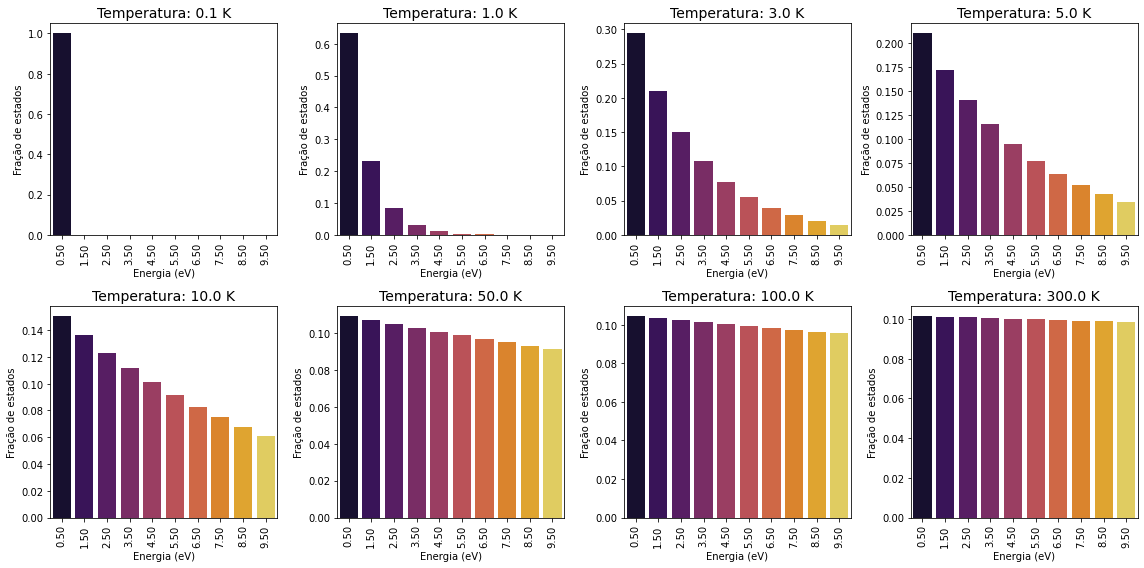

In [39]:
fig, ax = plt.subplots(2,4, figsize=(16,8))

for i in range(len(T_key)):
  ensemble = {}
  densities = []
  for energy in E:
    density = rho_kk(T_key[i], E_k = energy, E_i = E)[0]
    densities.append(density)
  ensemble['Energy'] = E
  ensemble['Density'] = densities
  if i < 4:
    sns.barplot(data = ensemble, x = 'Energy', y = 'Density', palette = 'inferno', ax = ax[0,i])
    ax[0,i].set_title(f'Temperatura: {T_key[i]:.1f} K', fontsize = 14)
    ax[0,i].set_xticks([0,1,2,3,4,5,6,7,8,9])
    ax[0,i].set_xticklabels([f'{E[i]:.2f}' for i in range(len(E))], rotation = 90)
    ax[0,i].set_xlabel('Energia (eV)')
    ax[0,i].set_ylabel('Fração de estados')
  else:
    sns.barplot(data = ensemble, x = 'Energy', y = 'Density', palette = 'inferno', ax = ax[1,i-4])
    ax[1,i-4].set_title(f'Temperatura: {T_key[i]:.1f} K', fontsize = 14)
    ax[1,i-4].set_xticks([0,1,2,3,4,5,6,7,8,9])
    ax[1,i-4].set_xticklabels([f'{E[i]:.2f}' for i in range(len(E))], rotation = 90)
    ax[1,i-4].set_xlabel('Energia (eV)')
    ax[1,i-4].set_ylabel('Fração de estados')

plt.tight_layout()

Como dito anteriormente, já que a distância energética $\Delta E$ entre os estados vizinhos é a mesma, os estados de maior energia não necessariamente tem maior facilidade para serem preenchidos e a discrepância de ocupação entre os estados de maior energia fica evidente por mais tempo.

Espero que com estes exemplos, você, belíssimo(a/e) leitor(a/e), tenha conseguido adquirir uma certa visualização de o que são ensembles e como a temperatura do sistema modifica a configuração e a entropia destes ensembles :)

# Espero que tenha gostado :)

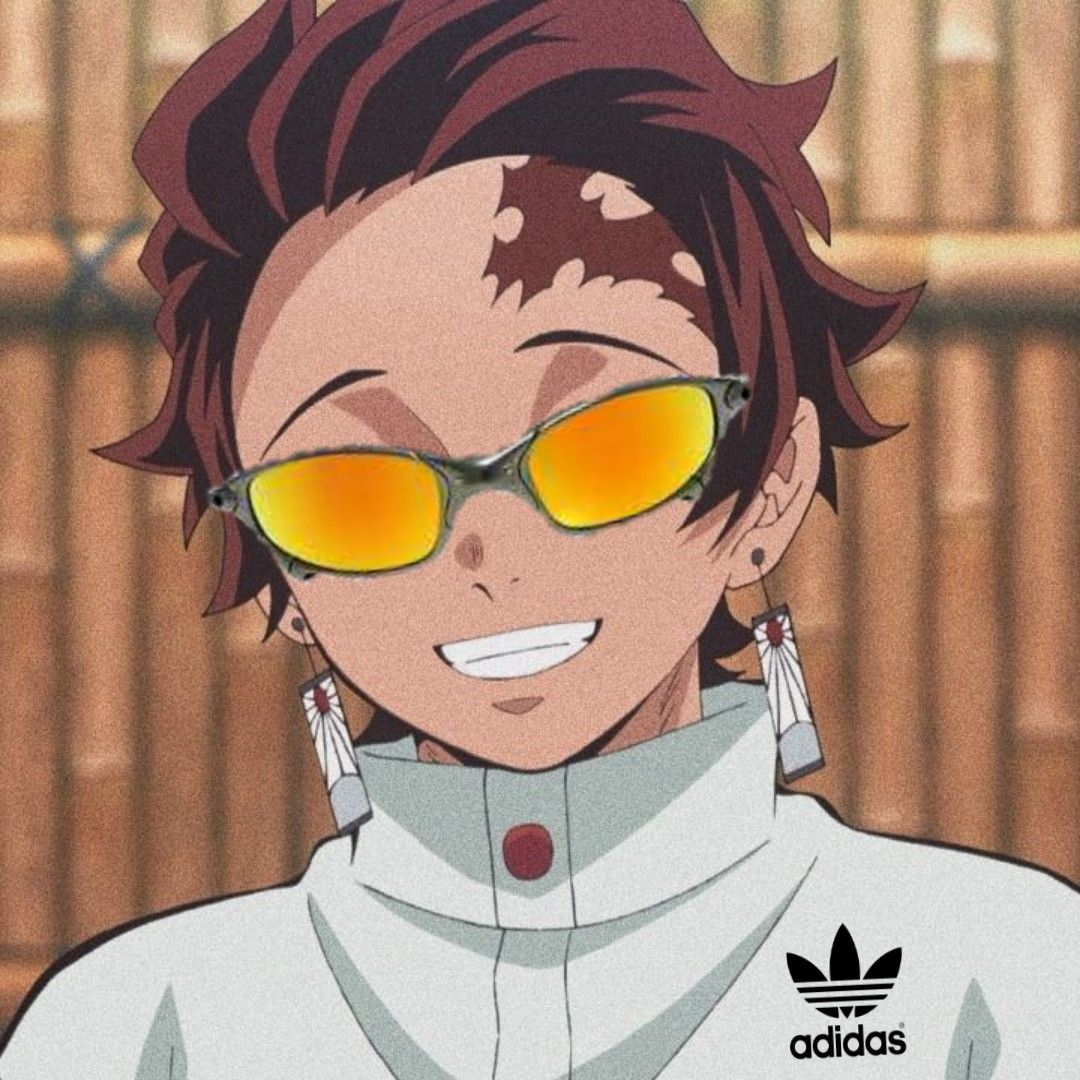

In [40]:
Image(filename='tanjiro_funk.jpg', width = 500, height = 500)

**Pedro Cintra**

Instituto de Física "Gleb Wataghin"

Universidade de Campinas, São Paulo, Brasil

Web: [https://sites.google.com/view/pedrocintra](https://sites.google.com/view/pedrocintra)

Lattes: [http://lattes.cnpq.br/1191661313631770](http://lattes.cnpq.br/1191661313631770)

Twitter: [@pedrocintra52](https://twitter.com/pedrocintra52)